 Implement Linear regression to predict house prices using gradient descent algorithm. (use  homeprice_uni.csv)

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Data Loading
data = pd.read_excel('homeprices_uni.xlsx')
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Step 2: Data Preprocessing
# Feature scaling/normalization
X = (X - np.mean(X)) / np.std(X)

# Step 3: Gradient Descent Algorithm
def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    cost_history = np.zeros(iterations)
    for i in range(iterations):
        h = X.dot(theta)
        loss = h - y
        gradient = X.T.dot(loss) / m
        theta = theta - learning_rate * gradient
        cost = np.sum((X.dot(theta) - y) ** 2) / (2 * m)
        cost_history[i] = cost
    return theta, cost_history


In [10]:
theta = np.zeros(X.shape[1] + 1)
X = np.c_[np.ones(X.shape[0]), X]  # Add intercept term

# Set hyperparameters
learning_rate = 0.01
iterations = 1000

# Run gradient descent
theta, cost_history = gradient_descent(X, y, theta, learning_rate, iterations)

In [11]:
cost_history

array([1.94242977e+11, 1.90379401e+11, 1.86592710e+11, 1.82881373e+11,
       1.79243893e+11, 1.75678798e+11, 1.72184649e+11, 1.68760033e+11,
       1.65403567e+11, 1.62113895e+11, 1.58889688e+11, 1.55729642e+11,
       1.52632481e+11, 1.49596953e+11, 1.46621832e+11, 1.43705917e+11,
       1.40848028e+11, 1.38047011e+11, 1.35301734e+11, 1.32611089e+11,
       1.29973987e+11, 1.27389363e+11, 1.24856174e+11, 1.22373395e+11,
       1.19940023e+11, 1.17555075e+11, 1.15217588e+11, 1.12926617e+11,
       1.10681236e+11, 1.08480538e+11, 1.06323634e+11, 1.04209653e+11,
       1.02137739e+11, 1.00107057e+11, 9.81167856e+10, 9.61661204e+10,
       9.42542734e+10, 9.23804722e+10, 9.05439596e+10, 8.87439936e+10,
       8.69798470e+10, 8.52508068e+10, 8.35561746e+10, 8.18952655e+10,
       8.02674085e+10, 7.86719459e+10, 7.71082330e+10, 7.55756380e+10,
       7.40735416e+10, 7.26013369e+10, 7.11584291e+10, 6.97442352e+10,
       6.83581837e+10, 6.69997147e+10, 6.56682792e+10, 6.43633392e+10,
      

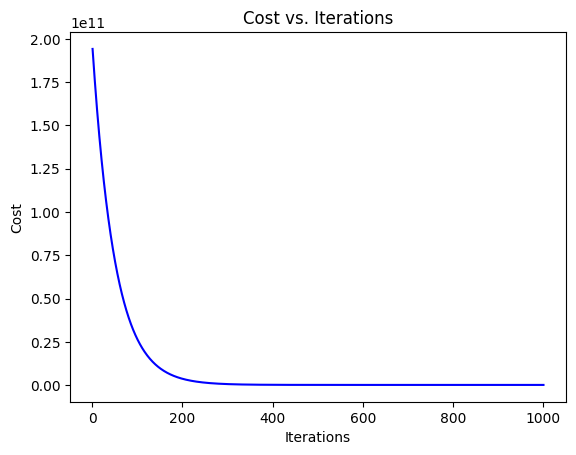

In [12]:
plt.plot(range(1, iterations + 1), cost_history, color='blue')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs. Iterations')
plt.show()

In [13]:
new_data = np.array([1650])  # Example feature value
new_data = (new_data - np.mean(data.values[:, :-1])) / np.std(data.values[:, :-1])  # Normalize
new_data = np.append(1, new_data)  # Add intercept term
predicted_price = np.dot(new_data, theta)
print("Predicted house price:", predicted_price)

Predicted house price: 404648.6259502662
